In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
s = tf.InteractiveSession(config=tf.ConfigProto())

y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X [shape - (360, 64)]:
X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0.]]
y:
 [0 1 0 1 0 1 0 0 1 1]


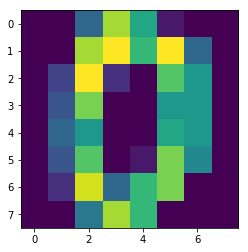

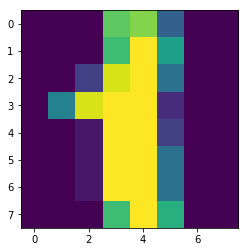

In [2]:
import numpy as np
from sklearn.datasets import load_digits
mnist = load_digits(2)

X,y = mnist.data, mnist.target

print("y [shape - %s]:" % (str(y.shape)), y[:10])
print("X [shape - %s]:" % (str(X.shape)))

print('X:\n',X[:3,:10])
print('y:\n',y[:10])
plt.imshow(X[0].reshape([8,8]))
plt.show()
plt.imshow(X[1].reshape([8,8]))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [4]:
# inputs and shareds
weights = tf.Variable(dtype='float32', initial_value=np.zeros((64, 1)), name='weights')
b = tf.Variable(dtype='float32', initial_value=1, name='bias')

input_X = tf.placeholder('float32', [None, 64], name='X')
input_y = tf.placeholder('float32', [None, 1], name='y')

In [5]:
def predict_function(input_X):
    return tf.round(tf.nn.sigmoid(tf.matmul(tf.cast(input_X, tf.float32), weights))).eval()

loss at iter  0: 0.3068
train auc      : 0.5000
test auc       : 0.5000
loss at iter  1: 0.2338
train auc      : 0.9453
test auc       : 0.9146
loss at iter  2: 0.2024
train auc      : 0.5789
test auc       : 0.6122
loss at iter  3: 0.1182
train auc      : 0.9962
test auc       : 0.9898
loss at iter  4: 0.0214
train auc      : 0.9850
test auc       : 0.9796
loss at iter  5: 0.0104
train auc      : 0.9812
test auc       : 0.9796
loss at iter  6: 0.0098
train auc      : 0.9812
test auc       : 0.9796
loss at iter  7: 0.0093
train auc      : 0.9850
test auc       : 0.9796
loss at iter  8: 0.0088
train auc      : 0.9887
test auc       : 0.9796
loss at iter  9: 0.0084
train auc      : 0.9887
test auc       : 0.9796
resulting weights:


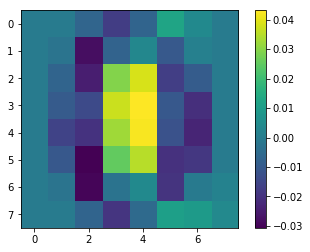

In [6]:
from sklearn.metrics import roc_auc_score

model = tf.nn.sigmoid(tf.matmul(input_X, weights) + b)

loss = tf.reduce_mean((model - input_y) ** 2, name='loss_func') 

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

s.run(tf.global_variables_initializer())

for i in range(10):
    _, loss_i = s.run(
        [optimizer, loss],
        feed_dict={input_X: X_train, input_y: y_train.reshape((-1, 1))}
    )
    
    print("loss at iter {:2d}: {:.4f}".format(i, loss_i))
    print("train auc      : {:.4f}".format(roc_auc_score(y_train, predict_function(X_train))))
    print("test auc       : {:.4f}".format(roc_auc_score(y_test, predict_function(X_test))))

    
shared_weights = weights.eval()
print ("resulting weights:")
plt.imshow(shared_weights.reshape(8, -1))
plt.colorbar();